In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%cd /content/drive/MyDrive/CRM/

/content/drive/MyDrive/CRM


In [2]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/CRM/K2D/K2D-Light.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [4]:
df= pd.DataFrame(pd.read_excel(r'Customer Behaviors (Responses).xlsx', dtype={'คุณเกิดวันที่เท่าไหร่' : str}))
df = df[df.columns[1:]]

# Data Cleaning

In [5]:
from datetime import datetime

# rename columns
int_cols = [ c.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด','Interest') for c in df.columns[:30] ]
con_cols = [ c.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน','Consumption') for c in df.columns[30:60] ]
df.columns = int_cols + con_cols + ['interests', 'dob', 'gender']

# convert data scaling
intr_cattype = pd.CategoricalDtype(categories=['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 
                                              'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด'], ordered=True)
cons_cattype = pd.CategoricalDtype(categories=['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 
                                               'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน'], ordered=True)

for col in df.columns[:30]:
    df[col] = df[col].astype(intr_cattype)

for col in df.columns[30:60]:
    df[col] = df[col].astype(cons_cattype)

# gender
df['gender'] = df['gender'].map({'หญิง':'F', 'ชาย':'M', 'ไม่ต้องการระบุ': np.nan})

# birthday
df['year'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[0]))
df['year'] = df['year'].apply(lambda x: x if x < 2500 else x - 543)
df['month'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[1]))
df['day'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[2]))

df['dob'] = pd.to_datetime(df[['year','month','day']])
df['age'] = df['year'].apply(lambda x: datetime.now().year - x if x < 2010 else np.nan)
df['age_group'] = pd.cut(df['age'], bins=[0,28,32,36,99], right=False, labels=['below 28','28 - 32', '32 - 36','more than 36'])

#df.drop(['year','month','day'], axis=1, inplace=True)

# drop n/a
df[df.isna().any(axis=1)]
df.head()

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,year,month,day,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,1988,9,19,33.0,32 - 36
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,1993,8,10,28.0,28 - 32
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แท

In [6]:
intr_scale = ['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด']
cons_scale = ['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน']

In [7]:
intr_questions = list(df.columns[:30])
cons_questions = list(df.columns[30:60])

intr_mapper = { v:i for i,v in enumerate(intr_scale,1) }
cons_mapper = { v:i for i,v in enumerate(cons_scale,1) }
print(intr_mapper, cons_mapper, sep='\n')

{'ไม่สนใจอย่างมากที่สุด': 1, 'ไม่สนใจอย่างมาก': 2, 'ไม่สนใจ': 3, 'เฉยๆ': 4, 'สนใจ': 5, 'สนใจอย่างมาก': 6, 'สนใจอย่างมากที่สุด': 7}
{'แทบไม่ได้บริโภคเลย': 1, 'หลายเดือนครั้ง': 2, 'เดือนละครั้ง': 3, 'เดือนละ 2-3 ครั้ง': 4, 'อาทิตย์ละครั้ง': 5, 'แทบทุกวัน': 6}


In [8]:
score_df = df[list(df.columns[:60]) + ['gender','age_group']].copy()

for col in score_df.columns[:30]:
    score_df[col] = score_df[col].map(intr_mapper).astype(int)

for col in score_df.columns[30:60]:
    score_df[col] = score_df[col].map(cons_mapper).astype(int)

#score_df = score_df.melt(id_vars=['gender','age_group'], var_name='question', value_name='score')
print(score_df.shape)
score_df.head()

(63, 62)


,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],gender,age_group
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,M,32 - 36
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,F,28 - 32
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,M,28 - 32
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1,6,4,1,3,3,3,1,1,1,6,3,4,2,4,4,4,5,5,5,5,1,6,3,3,1,1,1,4,M,below 28
4,6,5,5,5,7,4,4,4,4,4,5,6,7,3,5,6,5,5,7,7,4,7,4,3,4,5,5,3,3,4,4,3,5,5,6,2,2,2,3,3,6,6,6,1,2,4,5,4,5,5,4,5,3,1,3,4,3,1,1,4,F,below 28


In [329]:
score_df['age_group'].value_counts()

28 - 32         29
below 28        12
32 - 36         11
more than 36    10
Name: age_group, dtype: int64

#EDA

## Demographic

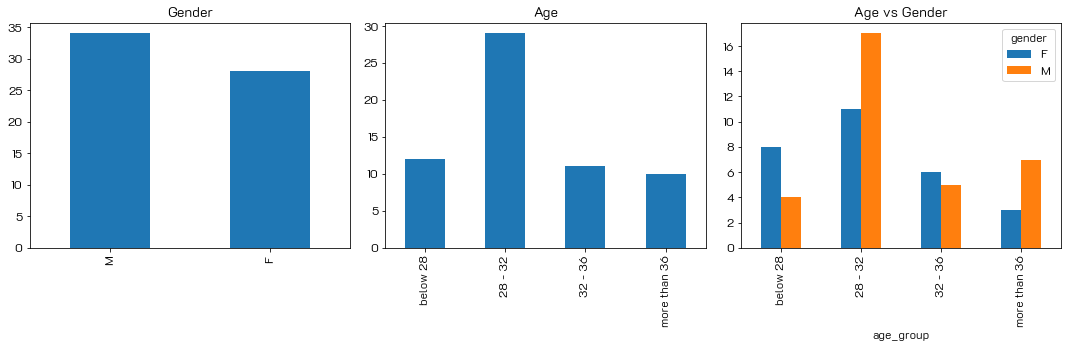

In [9]:
f, axes = plt.subplots(1,3, figsize=(15,5), tight_layout=True)

df['gender'].value_counts().plot(kind='bar',title='Gender', ax=axes[0])
df['age_group'].value_counts().sort_index().plot(kind='bar',title='Age', ax=axes[1])
df['no'] = 1
df[['age_group','gender','no']].groupby(by=['age_group','gender'],as_index=False).sum().pivot(index='age_group',columns='gender',values='no').plot(kind='bar',title='Age vs Gender', ax=axes[2])

## Frequency

In [331]:
# Average Interest
avg_int_all = pd.DataFrame(round(score_df[score_df.columns[:29]].mean(),2).T).reset_index()
avg_int_sex = pd.DataFrame(round(score_df[list(score_df.columns[:29]) + ['gender']].groupby(['gender']).mean(),2).T).reset_index()

avg_int_all = avg_int_all.set_axis(['Interest','Interest - Overall'], axis=1, inplace=False) #.sort_values('Interest - Overall',ascending=False)
avg_int_sex = avg_int_sex.set_axis(['Interest','Interest - Female','Interest - Male'], axis=1, inplace=False)

avg_int = avg_int_all.merge(avg_int_sex, on='Interest',how='left') 

avg_int ['Interest'] = avg_int['Interest'].str.replace('Interest','')
avg_int ['Interest'] = avg_int['Interest'].str.replace('[','')
avg_int ['Interest'] = avg_int['Interest'].str.replace(']','')
avg_int ['Interest'] = avg_int['Interest'].str.replace(' ','')

# Average Consumption
avg_con_all = pd.DataFrame(round(score_df[score_df.columns[30:59]].mean(),2).T).reset_index()
avg_con_sex = pd.DataFrame(round(score_df[list(score_df.columns[30:59]) + ['gender']].groupby(['gender']).mean(),2).T).reset_index()

avg_con_all = avg_con_all.set_axis(['Consumption','Consumption - Overall'], axis=1, inplace=False) #.sort_values('Consumption - Overall',ascending=False)
avg_con_sex = avg_con_sex.set_axis(['Consumption','Consumption - Female','Consumption - Male'], axis=1, inplace=False)

avg_con = avg_con_all.merge(avg_con_sex, on='Consumption',how='left') 

avg_con ['Consumption'] = avg_con['Consumption'].str.replace('Consumption','')
avg_con ['Consumption'] = avg_con['Consumption'].str.replace('[','')
avg_con ['Consumption'] = avg_con['Consumption'].str.replace(']','')
avg_con ['Consumption'] = avg_con['Consumption'].str.replace(' ','')

avg_all = avg_int.merge(avg_con, left_on='Interest', right_on='Consumption',how='left').drop(columns=['Consumption']).rename(columns={'Interest' : 'Content'}).sort_values('Interest - Overall',ascending=False).set_index('Content')

In [349]:
avg_all.head()

,Interest - Overall,Interest - Female,Interest - Male,Consumption - Overall,Consumption - Female,Consumption - Male
Content,,,,,,
อาหารญี่ปุ่น,6.08,6.04,6.15,3.92,3.86,3.97
การท่องเที่ยว,6.03,6.07,6.00,2.52,2.75,2.35
ดูหนัง,5.71,5.75,5.71,3.92,3.82,4.03
ดูNetflix,5.70,5.64,5.76,4.35,4.29,4.38
ชาบูชาบู,5.68,5.64,5.76,3.06,2.96,3.15


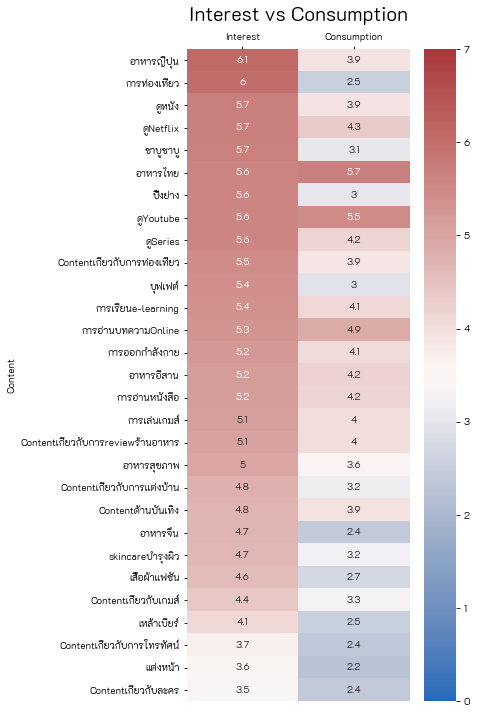

In [324]:
avg_all_content = avg_all[list(avg_all.columns[:1]) + ['Consumption - Overall']].rename(columns={'Interest - Overall' : 'Interest', 'Consumption - Overall' : 'Consumption'})

mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(5, 12))
hm_interest = sns.heatmap(avg_all_content, vmin=0, vmax=7, annot=True, cmap='vlag')
hm_interest.set_title('Interest vs Consumption', fontdict={'fontsize':20}, pad=12);
hm_interest.set_xticklabels(hm_interest.get_xticklabels(), rotation=0)
hm_interest.xaxis.tick_top()
hm_interest.xaxis.set_label_position('top')
plt.show()

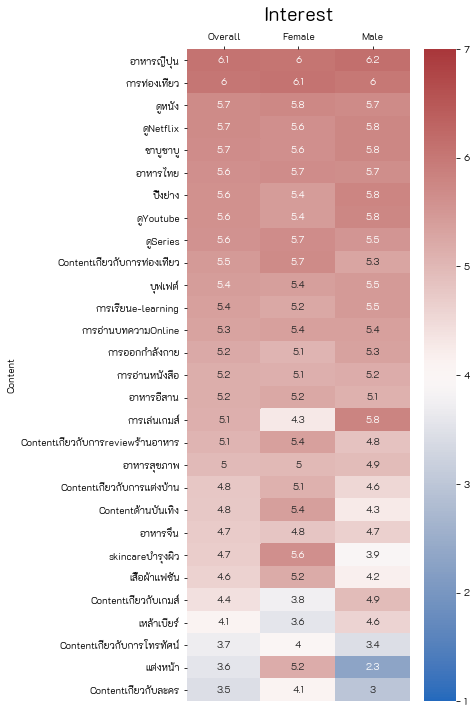

In [348]:
avg_all_content = avg_all[list(avg_all.columns[:1]) + ['Interest - Female']+ ['Interest - Male']].rename(columns={'Interest - Overall' : 'Overall', 'Interest - Female' : 'Female', 'Interest - Male' : 'Male'}).sort_values('Overall',ascending=False)

mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(5, 12))
hm_interest = sns.heatmap(avg_all_content, vmin=1, vmax=7, annot=True, cmap='vlag')
hm_interest.set_title('Interest', fontdict={'fontsize':20}, pad=12);
hm_interest.set_xticklabels(hm_interest.get_xticklabels(), rotation=0)
hm_interest.xaxis.tick_top()
hm_interest.xaxis.set_label_position('top')
plt.show()

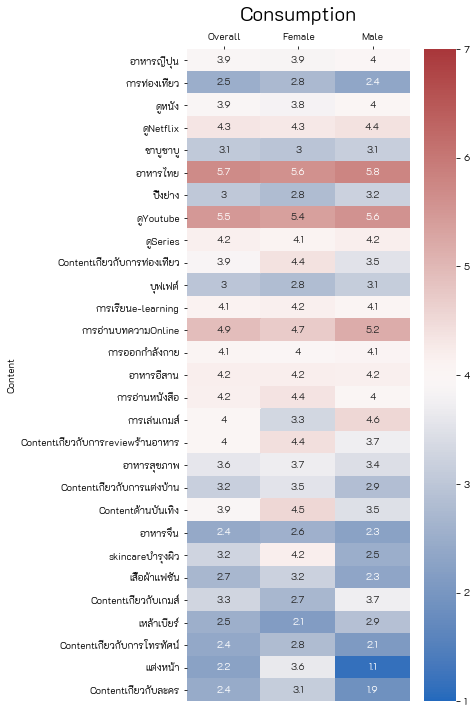

In [351]:
avg_all_content = avg_all[list(avg_all.columns[3:6])].rename(columns={'Consumption - Overall' : 'Overall', 'Consumption - Female' : 'Female', 'Consumption - Male' : 'Male'}) #.sort_values('Overall',ascending=False)

mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(5, 12))
hm_interest = sns.heatmap(avg_all_content, vmin=1, vmax=7, annot=True, cmap='vlag')
hm_interest.set_title('Consumption', fontdict={'fontsize':20}, pad=12);
hm_interest.set_xticklabels(hm_interest.get_xticklabels(), rotation=0)
hm_interest.xaxis.tick_top()
hm_interest.xaxis.set_label_position('top')
plt.show()

## Interest Correlation

In [241]:
int_cols = [col for col in score_df.columns if 'Interest' in col]
df_encode_interest = score_df[int_cols].copy()  
df_encode_interest
df_corr_interest= round(df_encode_interest.corr(method='spearman'),2)

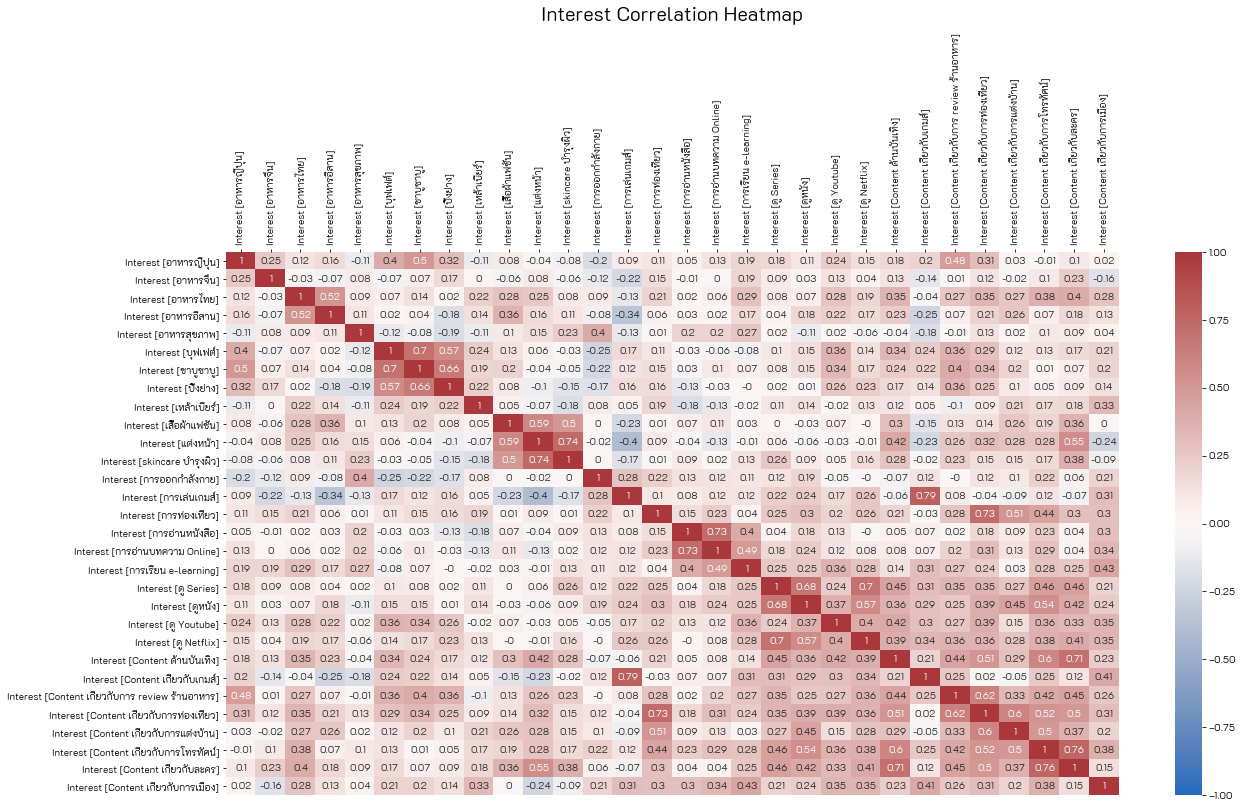

In [54]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 10))
hm_interest = sns.heatmap(df_corr_interest, vmin=-1, vmax=1, annot=True, cmap='vlag')
hm_interest.set_title('Interest Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
hm_interest.set_xticklabels(hm_interest.get_xticklabels(), rotation=90)
hm_interest.xaxis.tick_top()
#hm_interest.xaxis.set_label_position('top')
plt.show()

In [55]:
#eliminate duplicate pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    
#align left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df

## Top Interest Correlation

In [360]:
#Top Interest correlation positive

labels_to_drop = get_redundant_pairs(df_encode_interest)
corr_interest_top_pos = df_corr_interest.unstack()
corr_interest_top_pos = corr_interest_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_interest = pd.DataFrame(corr_interest_top_pos.head(10)).reset_index()
top_corr_interest = top_corr_interest.set_axis(['Interest - 1','Interest - 2','Correlation'], axis=1, inplace=False)
top_corr_interest 

,Interest - 1,Interest - 2,Correlation
0,Interest [การเล่นเกมส์],Interest [Content เกี่่ยวกับเกมส์],0.79
1,Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],0.76
2,Interest [แต่งหน้า],Interest [skincare บำรุงผิว],0.74
3,Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],0.73
4,Interest [การท่องเที่ยว],Interest [Content เกี่ยวกับการท่องเที่ยว],0.73
5,Interest [Content ด้านบันเทิง],Interest [Content เกี่ยวกับละคร],0.71
6,Interest [ดู Series],Interest [ดู Netflix],0.70
7,Interest [บุฟเฟต์],Interest [ชาบูชาบู],0.70
8,Interest [ดู Series],Interest [ดูหนัง],0.68
9,Interest [ชาบูชาบู],Interest [ปิ้งย่าง],0.66


In [365]:
#Top Interest correlation negative
labels_to_drop = get_redundant_pairs(df_encode_interest)
corr_interest_top_pos = df_corr_interest.unstack()
corr_interest_top_pos = corr_interest_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr_interest = pd.DataFrame(corr_interest_top_pos.head(10)).reset_index()
top_corr_interest = top_corr_interest.set_axis(['Interest - 1','Interest - 2','Correlation'], axis=1, inplace=False)
top_corr_interest

,Interest - 1,Interest - 2,Correlation
0,Interest [แต่งหน้า],Interest [การเล่นเกมส์],-0.40
1,Interest [อาหารอีสาน],Interest [การเล่นเกมส์],-0.34
2,Interest [อาหารอีสาน],Interest [Content เกี่่ยวกับเกมส์],-0.25
3,Interest [บุฟเฟต์],Interest [การออกกำลังกาย],-0.25
4,Interest [แต่งหน้า],Interest [Content เกี่ยวกับการเมือง],-0.24
5,Interest [เสื้อผ้าแฟชั่น],Interest [การเล่นเกมส์],-0.23
6,Interest [แต่งหน้า],Interest [Content เกี่่ยวกับเกมส์],-0.23
7,Interest [ชาบูชาบู],Interest [การออกกำลังกาย],-0.22
8,Interest [อาหารจึน],Interest [การเล่นเกมส์],-0.22
9,Interest [อาหารญี่ปุ่น],Interest [การออกกำลังกาย],-0.20


## Consumption Correlation

In [67]:
con_cols = [col for col in score_df.columns if 'Consumption' in col]
df_encode_consume = score_df[con_cols].copy()  
df_encode_consume
df_corr_consume= round(df_encode_consume.corr(method='spearman'),2)

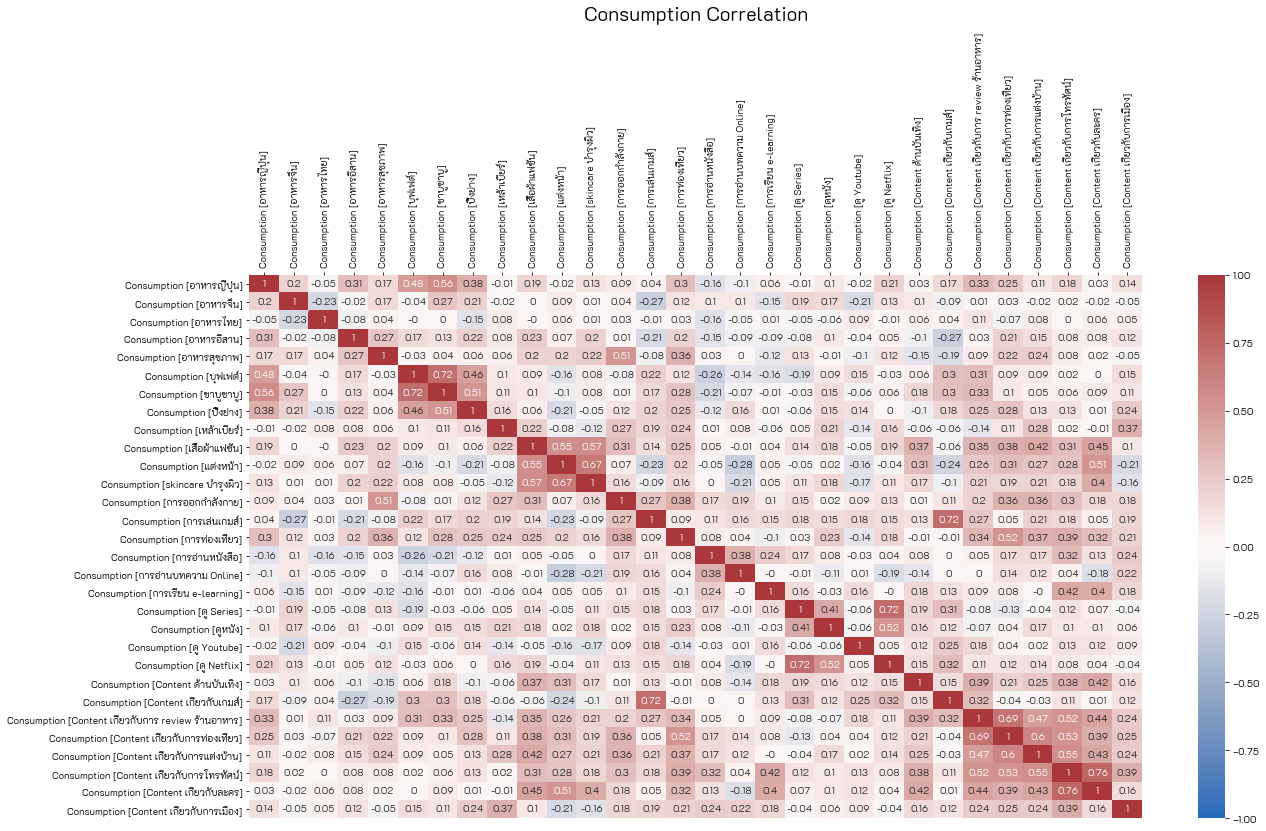

In [69]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 10))
hm_consume = sns.heatmap(df_corr_consume, vmin=-1, vmax=1, annot=True, cmap='vlag')
hm_consume.set_title('Consumption Correlation', fontdict={'fontsize':20}, pad=12);
hm_consume.set_xticklabels(hm_consume.get_xticklabels(), rotation=90)
hm_consume.xaxis.tick_top()
#hm_consume.xaxis.set_label_position('top')
plt.show()

## Top Consumption Correlation

In [363]:
#Top Interest correlation positive
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_consume = corr_consume_top_pos.head(10).reset_index()
top_corr_consume = top_corr_consume.set_axis(['Consumption - 1','Consumption - 2','Correlation'], axis=1, inplace=False)

top_corr_consume

,Consumption - 1,Consumption - 2,Correlation
0,Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],0.76
1,Consumption [การเล่นเกมส์],Consumption [Content เกี่่ยวกับเกมส์],0.72
2,Consumption [ดู Series],Consumption [ดู Netflix],0.72
3,Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],0.72
4,Consumption [Content เกี่ยวกับการ review ร้านอ...,Consumption [Content เกี่ยวกับการท่องเที่ยว],0.69
5,Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],0.67
6,Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],0.60
7,Consumption [เสื้อผ้าแฟชั่น],Consumption [skincare บำรุงผิว],0.57
8,Consumption [อาหารญี่ปุ่น],Consumption [ชาบูชาบู],0.56
9,Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],0.55


In [366]:
#Top Interest correlation Negative
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr_consume = corr_consume_top_pos.head(10).reset_index()
top_corr_consume = top_corr_consume.set_axis(['Consumption - 1','Consumption - 2','Correlation'], axis=1, inplace=False)

top_corr_consume

,Consumption - 1,Consumption - 2,Correlation
0,Consumption [แต่งหน้า],Consumption [การอ่านบทความ Online],-0.28
1,Consumption [อาหารอีสาน],Consumption [Content เกี่่ยวกับเกมส์],-0.27
2,Consumption [อาหารจึน],Consumption [การเล่นเกมส์],-0.27
3,Consumption [บุฟเฟต์],Consumption [การอ่านหนังสือ],-0.26
4,Consumption [แต่งหน้า],Consumption [Content เกี่่ยวกับเกมส์],-0.24
5,Consumption [อาหารจึน],Consumption [อาหารไทย],-0.23
6,Consumption [แต่งหน้า],Consumption [การเล่นเกมส์],-0.23
7,Consumption [อาหารจึน],Consumption [ดู Youtube],-0.21
8,Consumption [อาหารอีสาน],Consumption [การเล่นเกมส์],-0.21
9,Consumption [ชาบูชาบู],Consumption [การอ่านหนังสือ],-0.21


## Correlation - Interest vs Consumption

In [367]:
#Top Interest correlation negative
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_consume = corr_consume_top_pos.head(10).to_frame(name='Correlation')
left_align(top_corr_consume)

,,Correlation
Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],0.760000
Consumption [การเล่นเกมส์],Consumption [Content เกี่่ยวกับเกมส์],0.720000
Consumption [ดู Series],Consumption [ดู Netflix],0.720000
Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],0.720000
Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],0.690000
Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],0.670000
Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],0.600000
Consumption [เสื้อผ้าแฟชั่น],Consumption [skincare บำรุงผิว],0.570000
Consumption [อาหารญี่ปุ่น],Consumption [ชาบูชาบู],0.560000
Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],0.550000


In [368]:
#Top Interest correlation negative
df_corr = round(score_df[score_df.columns[:59]].corr(method='spearman'),2)

labels_to_drop = get_redundant_pairs(score_df[score_df.columns[:59]])
corr_top_pos = df_corr.unstack()
corr_top_pos = corr_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr = corr_top_pos.head(10).to_frame(name='Correlation')
left_align(top_corr)

,,Correlation
Interest [อาหารอีสาน],Consumption [Content เกี่่ยวกับเกมส์],-0.420000
Interest [แต่งหน้า],Interest [การเล่นเกมส์],-0.400000
Interest [การเล่นเกมส์],Consumption [แต่งหน้า],-0.360000
Interest [อาหารอีสาน],Interest [การเล่นเกมส์],-0.340000
Interest [Content เกี่่ยวกับเกมส์],Consumption [อาหารสุขภาพ],-0.330000
Interest [การเล่นเกมส์],Consumption [อาหารอีสาน],-0.320000
Interest [บุฟเฟต์],Consumption [การอ่านบทความ Online],-0.290000
Consumption [แต่งหน้า],Consumption [การอ่านบทความ Online],-0.280000
Interest [บุฟเฟต์],Consumption [การออกกำลังกาย],-0.280000
Interest [ชาบูชาบู],Consumption [การออกกำลังกาย],-0.280000
